About Dataset
Context

The National Park Service publishes a database of animal and plant species identified in individual national parks and verified by evidence — observations, vouchers, or reports that document the presence of a species in a park. All park species records are available to the public on the National Park Species portal; exceptions are made for sensitive, threatened, or endangered species when widespread distribution of information could pose a risk to the species in the park.
Content

Geography: USA

Time period: Present

Unit of analysis: National Park Species Dataset

National Park species lists provide information on the presence and status of species in our national parks. These species lists are works in progress and the absence of a species from a list does not necessarily mean the species is absent from a park. The time and effort spent on species inventories varies from park to park, which may result in data gaps. Species taxonomy changes over time and reflects regional variations or preferences; therefore, records may be listed under a different species name.

Each park species record includes a species ID, park name, taxonomic information, scientific name, one or more common names, record status, occurrence (verification of species presence in park), nativeness (species native or foreign to park), abundance (presence and visibility of species in park), seasonality (season and nature of presence in park), and conservation status (species classification according to US Fish & Wildlife Service). Taxonomic classes have been translated from Latin to English for species categorization; order, family, and scientific name (genus, species, subspecies) are in Latin.
The dataset we're exploring, the species at the most visited National Parks in the USA! NPSpecies contains species listed by National Parks maintained by National Parks Service (NPS). Given the size of the dataset, we're focusing on the 15 most visited parks. The data comes from NPS

In [4]:
import pandas as pd, matplotlib.pyplot as plt, sklearn as sk, numpy as np, math, seaborn as sns

In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv('./most_visited_nps_species_data.csv', engine='python')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61119 entries, 0 to 61118
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParkCode              61119 non-null  object 
 1   ParkName              61119 non-null  object 
 2   CategoryName          61119 non-null  object 
 3   Order                 60258 non-null  object 
 4   Family                60217 non-null  object 
 5   TaxonRecordStatus     61119 non-null  object 
 6   SciName               61119 non-null  object 
 7   CommonNames           34060 non-null  object 
 8   Synonyms              0 non-null      float64
 9   ParkAccepted          61119 non-null  bool   
 10  Sensitive             61119 non-null  bool   
 11  RecordStatus          61119 non-null  object 
 12  Occurrence            58666 non-null  object 
 13  OccurrenceTags        1445 non-null   object 
 14  Nativeness            56698 non-null  object 
 15  NativenessTags     

In [23]:
data.isnull().sum()

ParkCode                    0
ParkName                    0
CategoryName                0
Order                     861
Family                    902
TaxonRecordStatus           0
SciName                     0
CommonNames             27059
Synonyms                61119
ParkAccepted                0
Sensitive                   0
RecordStatus                0
Occurrence               2453
OccurrenceTags          59674
Nativeness               4421
NativenessTags          60994
Abundance               16956
NPSTags                 53657
ParkTags                30773
References                  0
Observations                0
Vouchers                    0
ExternalLinks           61090
TEStatus                57350
StateStatus             58805
OzoneSensitiveStatus    60742
GRank                   22854
SRank                   34770
dtype: int64

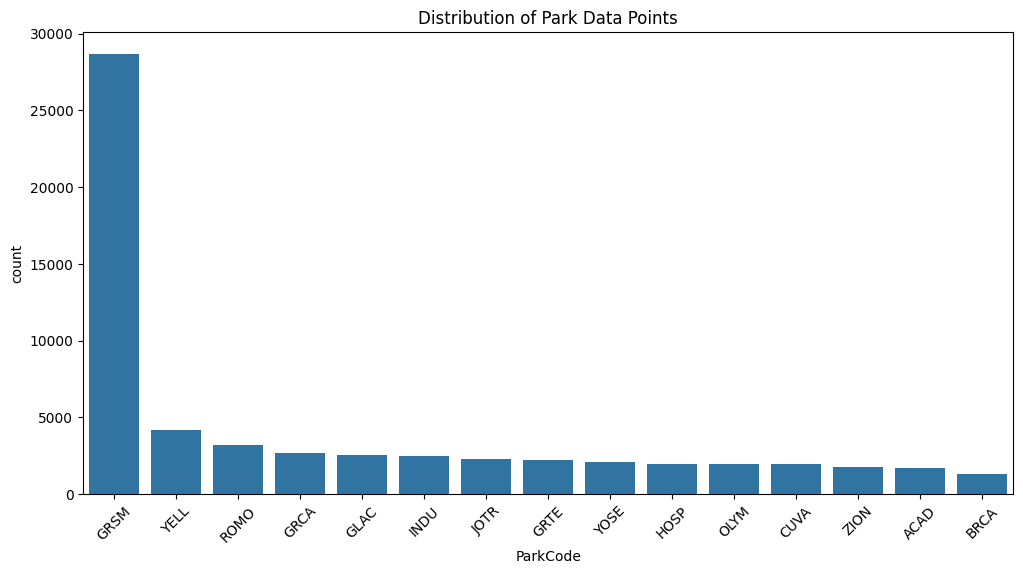

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='ParkCode',order=data['ParkCode'].value_counts().index)
plt.title('Distribution of Park Data Points')
plt.xticks(rotation=45)
plt.show()

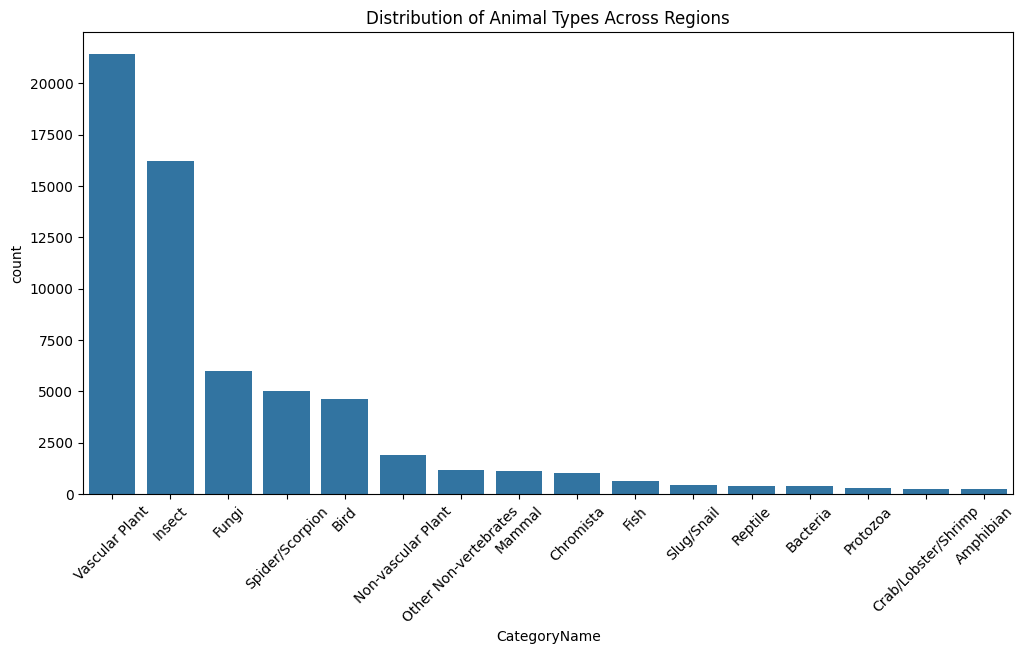

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='CategoryName',order=data['CategoryName'].value_counts().index)
plt.title('Distribution of Animal Types Across Regions')
plt.xticks(rotation=45)
plt.show()

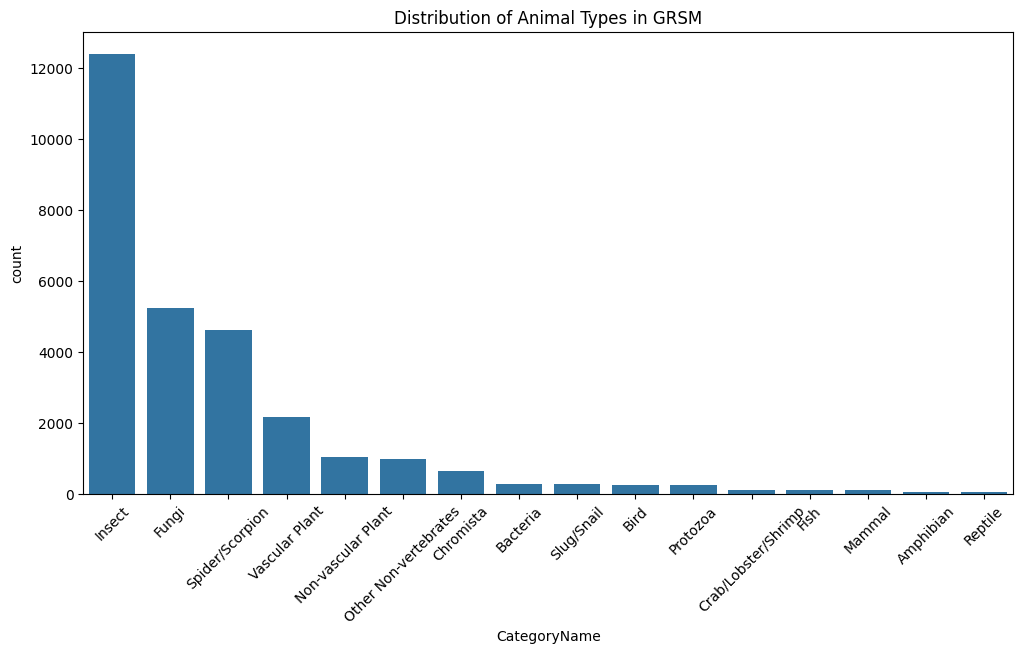

In [37]:
plt.figure(figsize=(12,6))
grsm = data.loc[data['ParkCode']=='GRSM']
sns.countplot(data=grsm,x='CategoryName',order=grsm['CategoryName'].value_counts().index)
plt.title('Distribution of Animal Types in GRSM')
plt.xticks(rotation=45)
plt.show()

In [40]:
grsm.describe()

,Synonyms,References,Observations,Vouchers
count,0.0,28670.000000,28670.000000,28670.000000
mean,NaN,0.549250,11.520893,8.630764
std,NaN,1.044411,163.244722,63.473505
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000
75%,NaN,1.000000,1.000000,3.000000
max,NaN,22.000000,11576.000000,6931.000000


In [44]:
grsm.loc[grsm['CategoryName']=='Insect']['Family'].value_counts()

Family
Scarabaeidae     1016
Noctuidae         470
Staphylinidae     461
Carabidae         349
Tipulidae         340
                 ... 
Ricinidae           1
Apatelodidae        1
Pselaphidae         1
Gracilariidae       1
Lepismatidae        1
Name: count, Length: 527, dtype: int64

In [71]:
grsm_insects = grsm.loc[grsm['CategoryName']=='Insect']
grsm_insects[['SciName','Family','Observations', 'References','Vouchers','Abundance']].nlargest(10, columns=['Observations', 'References','Vouchers'])

,SciName,Family,Observations,References,Vouchers,Abundance
31862,Danaus plexippus,Nymphalidae,1191,2,24,Common
25496,Aulonothroscus distans,Throscidae,1131,3,1137,Unknown
25373,Thoracophorus costalis,Staphylinidae,882,4,883,Unknown
22698,Dryophthorus americanus,Curculionidae,401,2,434,Unknown
23353,Cercyon occallatum,Hydrophilidae,389,0,390,Unknown
33458,Hydropsyche sparna,Hydropsychidae,290,3,305,Unknown
25167,Myrmedonota,Staphylinidae,282,0,282,Unknown
22233,Mychocerus striatus,Cerylonidae,263,3,353,Unknown
33452,Hydropsyche macleodi,Hydropsychidae,246,0,195,Unknown
24963,Atheta,Staphylinidae,238,0,239,Unknown


In [69]:
grsm_insects.describe()

,Synonyms,References,Observations,Vouchers
count,0.0,12398.000000,12398.000000,12398.000000
mean,NaN,0.461284,2.770044,12.002016
std,NaN,0.672638,20.465738,41.074573
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,1.000000
75%,NaN,1.000000,1.000000,6.000000
max,NaN,6.000000,1191.000000,1137.000000
